In [1]:
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read, write

plt.style.use('Solarize_Light2')

wav_path = './wav/russian.wav'

In [3]:
sample_rate, data = read(wav_path)
sig = data[:,0] / 32767

In [4]:
sig 

array([ 0.00021363,  0.00021363, -0.00076296, ...,  0.00027467,
        0.00042726,  0.00079348])

An expander is a **dynamic range** modifier that _increases_ the dynamic range of a signal, and is useful for noise reduction. The **ratio** of the expander is how much the amplitude of the signal below the threshold is reduced. An extremely high ratio such as $\infty:1$ causes the expander to function as a **noise gate**.

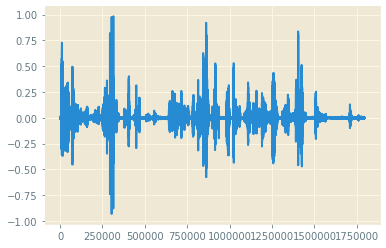

In [5]:
# Here's the left channel of our stereo input signal
plt.plot(sig)
plt.show()

In [92]:
# This just doesn't work, unfortunately
Audio(data=wav_path, autoplay=False)

First we need to calculate the db full scale from the linear amplitude of our input signal. In digital audio, decibels
are calculated relative to "full scale", i.e. the maximum possible amplitude allowed by the system, which is $\pm1$.
Decibel values range from $0db$ (maximum amplitude), to $-\infty db$ db (silence), though $-144db$ is the practical
lower limit for amplitude db values.

In [131]:
def db_fs(x):
    return 20*np.log10(np.abs(x)/1)

# input_db = db_fs(sig)


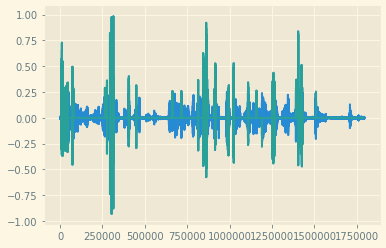

In [134]:
output_level = np.zeros(len(sig))
threshold = -12.0
for index, sample in enumerate(sig):
    if sample == 0:
        continue
    if db_fs(sample) > threshold:
        output_level[index] = sample

time = np.arange(len(sig))
plt.plot(time, sig, time, output_level)

In [135]:
write('./wav/gated_russian.wav', sample_rate, np.int16(output_level * 32767))